In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [156]:
df = pd.read_csv("insurance.csv")

In [157]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [159]:
df.shape

(1338, 7)

In [160]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [161]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [162]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

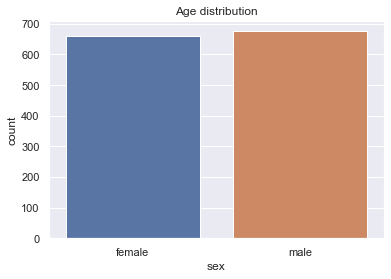

In [163]:
sns.countplot(x='sex',data=df)
plt.title('Age distribution')
plt.show()

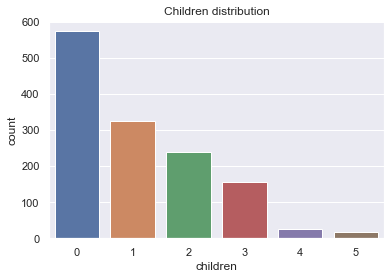

In [164]:
sns.countplot(x='children',data=df)
plt.title('Children distribution')
plt.show()

In [165]:
df.groupby('region')['charges'].sum()

region
northeast    4.343669e+06
northwest    4.035712e+06
southeast    5.363690e+06
southwest    4.012755e+06
Name: charges, dtype: float64

<AxesSubplot:xlabel='region', ylabel='charges'>

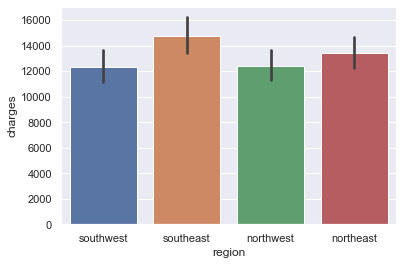

In [166]:
sns.barplot(x='region',y='charges',data=df)

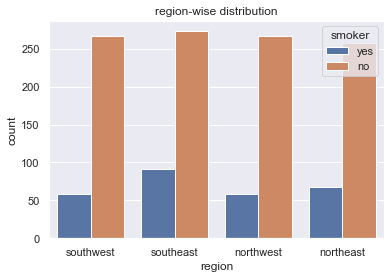

In [167]:
sns.countplot(x='region',data=df,hue='smoker')
plt.title('region-wise distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


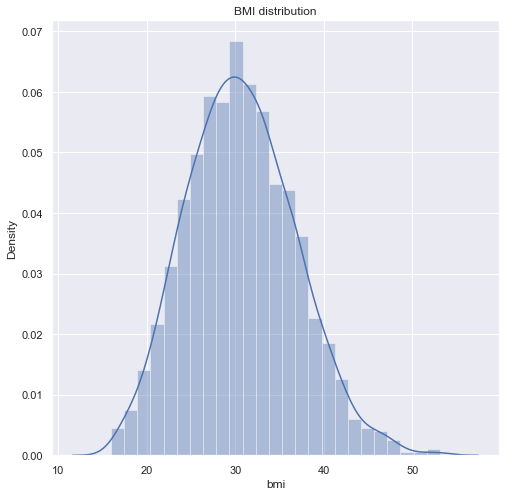

In [168]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title('BMI distribution')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


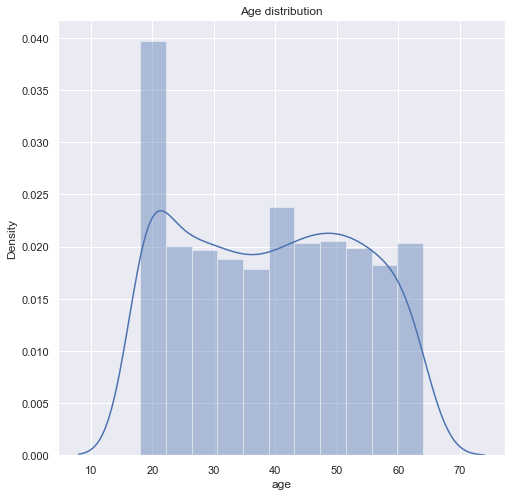

In [169]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.title('Age distribution')
plt.show()

In [170]:
# sns.pairplot(df)

In [171]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [172]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [173]:
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [174]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,1,16884.92400
1,18,0,33.770,1,no,0,1725.55230
2,28,0,33.000,3,no,0,4449.46200
3,33,0,22.705,0,no,3,21984.47061
4,32,0,28.880,0,no,3,3866.85520


In [175]:
df['sex'].value_counts()

0    676
1    662
Name: sex, dtype: int64

In [176]:
df['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

In [177]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [178]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [179]:
X = df.drop('charges',axis=1)
y = df['charges']

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [182]:
from sklearn.linear_model import LinearRegression

In [183]:
lr = LinearRegression()

In [184]:
lr.fit(X_train,y_train)

LinearRegression()

In [185]:
pred_train = lr.predict(X_train)

In [186]:
from sklearn import metrics

In [187]:
metrics.r2_score(y_train,pred_train)

0.751505643411174

### Test data prediction

In [188]:
pred_test = lr.predict(X_test)

In [189]:
metrics.r2_score(y_test,pred_test)

0.7447273869684077

In [190]:
input_data = (19,0,27.900,0,1,1)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = lr.predict(arr_reshaped)

print(prediction)

[1643.5205432]


In [191]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [192]:
input_data = (32,1,28.880,0,0,2)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = lr.predict(arr_reshaped)

print(prediction)

[29402.26187036]


In [193]:
input_data = (31,1,25.74,0,1,0)

arr = np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

prediction = lr.predict(arr_reshaped)

print(prediction)

[3760.0805765]
